In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from pycirclize import Circos, sector
from pycirclize.parser import Matrix
from itertools import permutations

In [3]:
table_5_A = pd.read_excel("Table_5.xlsx",sheet_name="Fig5 panel a")
table_5_B = pd.read_excel("Table_5.xlsx",sheet_name="Fig 5 panel b")
table_5_C = pd.read_excel("Table_5.xlsx",sheet_name="Fig5 panel c")

In [23]:
GCFs = []
pGCFs= []
for i in range(len(table_5_C)):
    GCFs.append("GCFs")
    pGCFs.append("pGCFs")

table_5_C["GCFs"] = GCFs
table_5_C["pGCFs"] = pGCFs

table_5_C_1 = table_5_C[["REDgroup", "Number of actual GCFs", "GCFs"]].rename(columns={"GCFs" : "groups", "Number of actual GCFs" : "Number of GCFs"})

table_5_C_2 = table_5_C[["REDgroup", "Number of potential GCFs", "pGCFs"]].rename(columns={"pGCFs" : "groups", "Number of potential GCFs" : "Number of GCFs"})

new_table_5_C = pd.concat((table_5_C_1, table_5_C_2))

In [4]:
table_5_B = table_5_B.replace({"Streptomyces_B":"SB","Streptomyces_C":"SC","Streptomyces_D":"SD"})

In [56]:
table_5_B = table_5_B.iloc[::-1]

In [70]:
table_5_B.values

array([['Actinobacteriota', 'Actinobacteriota', 16409],
       ['Actinobacteriota', 'Streptomyces', 7294],
       ['Actinobacteriota', 'SB', 216],
       ['Actinobacteriota', 'SC', 57],
       ['Actinobacteriota', 'SD', 36],
       ['Streptomyces', 'Streptomyces', 5908],
       ['Streptomyces', 'SB', 94],
       ['Streptomyces', 'SC', 15],
       ['Streptomyces', 'SD', 17],
       ['SB', 'SB', 103],
       ['SB', 'SC', 5],
       ['SB', 'SD', 6],
       ['SC', 'SC', 39],
       ['SC', 'SD', 1],
       ['SD', 'SD', 16]], dtype=object)

KeyboardInterrupt: 

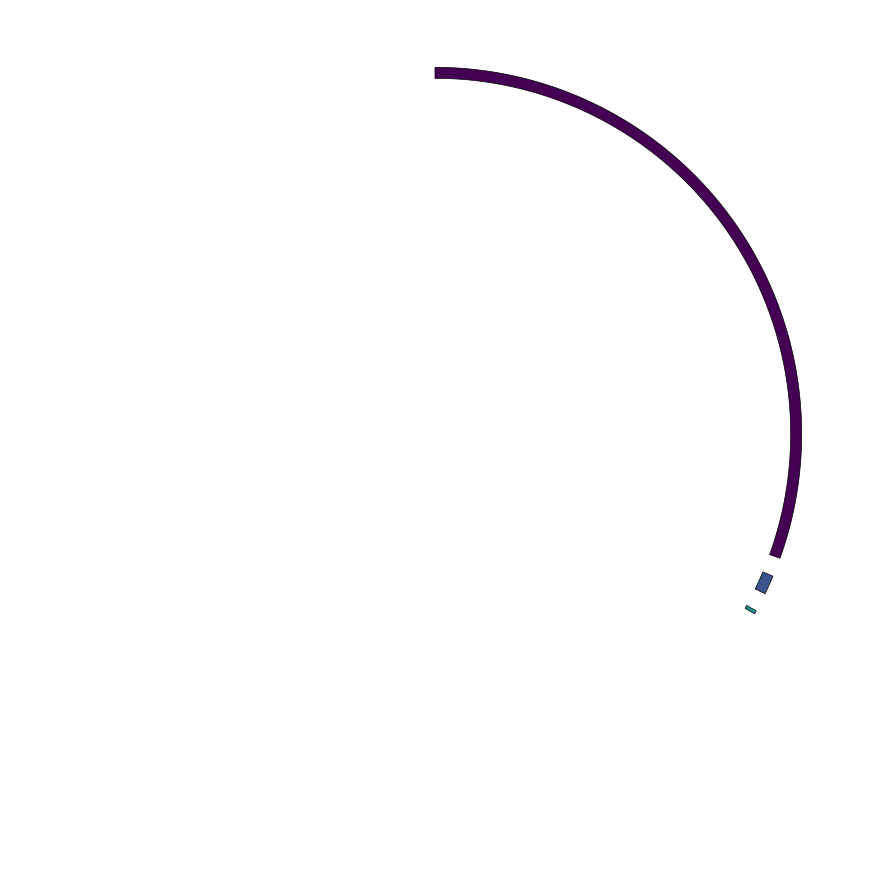

In [64]:
np.random.seed(42)

for i in range(100,200):
    matrix = Matrix.parse_fromto_table(table_5_B.sample(frac=1))

    circos = Circos.initialize_from_matrix(matrix, space=3)

    circos.savefig(f"fig{i}.png")

In [5]:
# my_liste = [ (('Actinobacteriota', 7603.0, 24012.0), ('Actinobacteriota', 40421.0, 24012.0)),
#     (('Streptomyces', 126.0, 6034.0), ('Streptomyces', 11942.0, 6034.0)),
#     (('Streptomyces', 32.0, 126.0), ('SB', 311.0, 217.0)),
#     (('Actinobacteriota', 309.0, 7603.0), ('Streptomyces', 19236.0, 11942.0)),
#     (('Actinobacteriota', 93.0, 309.0), ('SB', 527.0, 311.0)),
#     (('Actinobacteriota', 36.0, 93.0), ('SC', 156.0, 99.0)),
#     (('Actinobacteriota', 0.0, 36.0), ('SD', 92.0, 56.0)),
#     (('Streptomyces', 17.0, 32.0), ('SC', 99.0, 84.0)),
#     (('Streptomyces', 0.0, 17.0), ('SD', 56.0, 39.0)),
#     (('SD', 0.0, 16.0), ('SD', 32.0, 16.0)),
#     (('SC', 0.0, 1.0), ('SD', 33.0, 32.0)),
#     (('SC', 1.0, 40.0), ('SC', 79.0, 40.0)),
#     (('SB', 0.0, 6.0), ('SD', 39.0, 33.0)),
#     (('SB', 6.0, 11.0), ('SC', 84.0, 79.0)),
#     (('SB', 11.0, 114.0), ('SB', 217.0, 114.0))  
# ]

In [6]:
# bosliste = []
# sorted_list = ["Streptomyces","SB","SC","SD","Actinobacteriota"]

# for permutation in permutations(sorted_list):

#     matrix = Matrix.parse_fromto_table(table_5_B)
    
#     ax = Circos.initialize_from_matrix(matrix,
#                                    order=permutation,
#                                    space=3,
#                                    r_lim=(99,100),
#                                    cmap="tab10",
#                                    link_kws=dict(direction=0,r1=97,r2=97)
#                                   )
#     bosliste.append(ax)

In [7]:
# table_5_B = table_5_B.rename({"source taxon":"from","target taxon":"to","Number of shared GCFs":"value"},axis="columns")

In [8]:
# my_liste = [ (('Actinobacteriota', 7603.0, 24012.0), ('Actinobacteriota', 40421.0, 24012.0)),
#     (('Streptomyces', 126.0, 6034.0), ('Streptomyces', 11942.0, 6034.0)),
#     (('Streptomyces', 32.0, 126.0), ('SB', 311.0, 217.0)),
#     (('Actinobacteriota', 309.0, 7603.0), ('Streptomyces', 19236.0, 11942.0)),
#     (('Actinobacteriota', 93.0, 309.0), ('SB', 527.0, 311.0)),
#     (('Actinobacteriota', 36.0, 93.0), ('SC', 156.0, 99.0)),
#     (('Actinobacteriota', 0.0, 36.0), ('SD', 92.0, 56.0)),
#     (('Streptomyces', 17.0, 32.0), ('SC', 99.0, 84.0)),
#     (('Streptomyces', 0.0, 17.0), ('SD', 56.0, 39.0)),
#     (('SD', 0.0, 16.0), ('SD', 32.0, 16.0)),
#     (('SC', 0.0, 1.0), ('SD', 33.0, 32.0)),
#     (('SC', 1.0, 40.0), ('SC', 79.0, 40.0)),
#     (('SB', 0.0, 6.0), ('SD', 39.0, 33.0)),
#     (('SB', 6.0, 11.0), ('SC', 84.0, 79.0)),
#     (('SB', 11.0, 114.0), ('SB', 217.0, 114.0))  
# ]

In [9]:
# bosliste = []
# sorted_list = ['SD', 'SC', 'SB', 'Streptomyces', 'Actinobacteriota']

# for permutation in permutations(sorted_list):

#     matrix = Matrix.parse_fromto_table(table_5_B)
#     mylst = np.random.shuffle(matrix.all_names)
#     matrix = matrix.sort(mylst)
#     ax = Circos.initialize_from_matrix(matrix,
#                                    start=-150,end=210,
#                                    space=3,
#                                    r_lim=(99,100),
#                                    cmap="tab10",
#                                    link_kws=dict(direction=0,r1=97,r2=97)
#                                   )
#     bosliste.append(ax)

In [10]:
# for i, all_ax in enumerate(bosliste):
#     all_ax.savefig(f"fig{i}.png",dpi=21)

In [5]:
abc = pd.DataFrame(np.zeros((5,5)),  index=list(table_5_B["source taxon"].value_counts().index), columns=list(table_5_B["target taxon"].value_counts().index))

In [6]:
abc

,SD,SC,SB,Streptomyces,Actinobacteriota
Actinobacteriota,0.0,0.0,0.0,0.0,0.0
Streptomyces,0.0,0.0,0.0,0.0,0.0
SB,0.0,0.0,0.0,0.0,0.0
SC,0.0,0.0,0.0,0.0,0.0
SD,0.0,0.0,0.0,0.0,0.0


In [7]:
for i in range(len(table_5_B)):
    source = table_5_B["source taxon"][i]
    target = table_5_B["target taxon"][i]
    abc[source][target] = table_5_B['Number of shared GCFs'][i]

/var/folders/5c/snsg0_1d4499vnxz9dtgnzl00000gn/T/ipykernel_68384/2773433303.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  abc[source][target] = table_5_B['Number of shared GCFs'][i]


In [8]:
abc

,SD,SC,SB,Streptomyces,Actinobacteriota
Actinobacteriota,0.0,0.0,0.0,0.0,16409.0
Streptomyces,0.0,0.0,0.0,5908.0,7294.0
SB,0.0,0.0,103.0,94.0,216.0
SC,0.0,39.0,5.0,15.0,57.0
SD,16.0,1.0,6.0,17.0,36.0


In [23]:
abc.transpose()

,Actinobacteriota,Streptomyces,SB,SC,SD
SD,0.0,0.0,0.0,0.0,16.0
SC,0.0,0.0,0.0,39.0,1.0
SB,0.0,0.0,103.0,5.0,6.0
Streptomyces,0.0,5908.0,94.0,15.0,17.0
Actinobacteriota,16409.0,7294.0,216.0,57.0,36.0


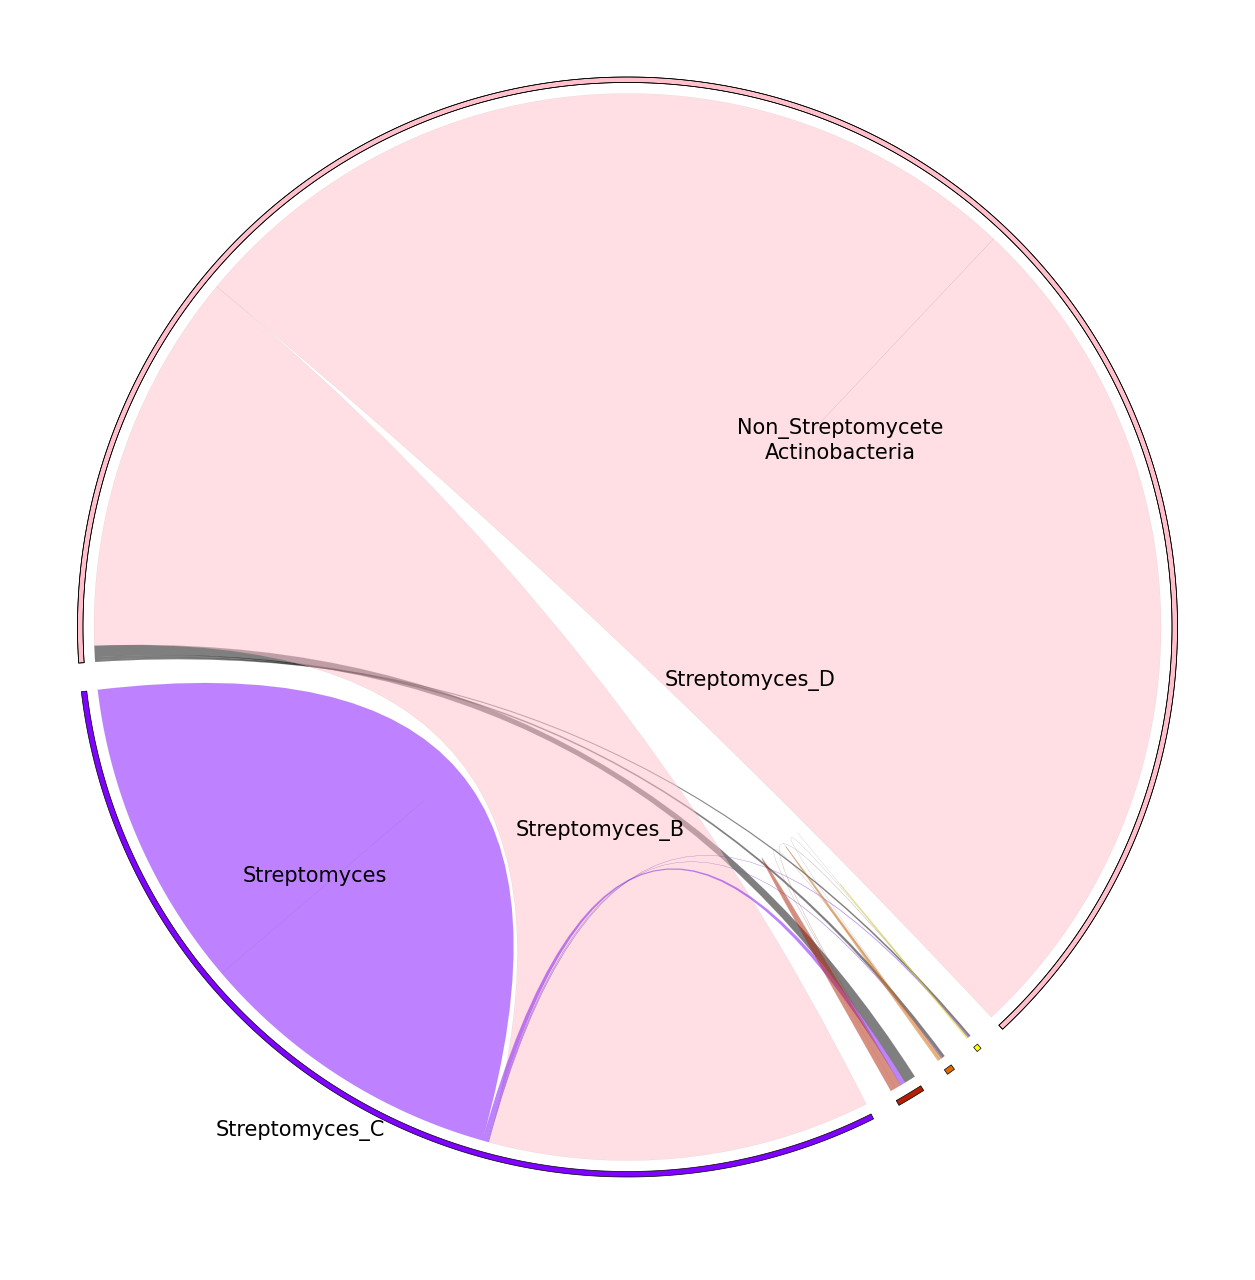

In [115]:
fig = plt.figure(figsize=(15, 15), dpi=100)

polar_ax4 = fig.add_subplot(polar=True)

circos = Circos.initialize_from_matrix(
    abc.transpose(),
    cmap="gnuplot_r",
    link_cmap=[("Actinobacteriota","Actinobacteriota","pink"),("Actinobacteriota","Streptomyces","pink")],
    space=3,
    start=-220,end=140,
    r_lim=(99,100),
    label_kws=dict(size=0,color="white"),
    link_kws=dict(direction=0,r1=97,r2=97),

)

for sector in circos.sectors:
    track = sector.get_track("Track01")
    if sector.name.startswith("A"):
        color = "pink"
        track.axis(fc=color)


# plt.text(0, -10, "Streptomyces", fontsize=12,ha="center")
# plt.text(30, 100, "Non_Streptomycete\nActinobacteria", fontsize=12, ha="center")

# plt.annotate("Streptomyces_D", (-50,-1))

# plt.annotate("Streptomyces_C", (-20,100))

# plt.annotate("Streptomyces_B", (-40,-150))


for text,xytext, color in zip(*[['Streptomyces_C', 'Streptomyces', 'Streptomyces_B','Streptomyces_D', 'Non_Streptomycete\nActinobacteria'],[(0.2, 0.1),(0.21, 0.27),(0.4, 0.3),(0.5, 0.4),(0.56, 0.56)],['b', 'b','b','b','b']]):
    plt.annotate(text,
                xy=(0,0),
                xytext=xytext,
                textcoords='figure fraction',
                horizontalalignment='center',
                verticalalignment='center',
                size=15
                )

fig = circos.plotfig(ax=polar_ax4)


# circos.savefig("Figure_5_B.png",dpi=800)

In [43]:

# importing PIL Module
from PIL import Image
 
# open the original image
original_img = Image.open("Figure_5_B.png")
 
 
# Flip the original image horizontally
horz_img = original_img.transpose(method=Image.FLIP_LEFT_RIGHT)
horz_img.save("Figure_5_B.png")
 
# close all our files object
original_img.close()
horz_img.close()

#### FIGURE 5 C i,ii

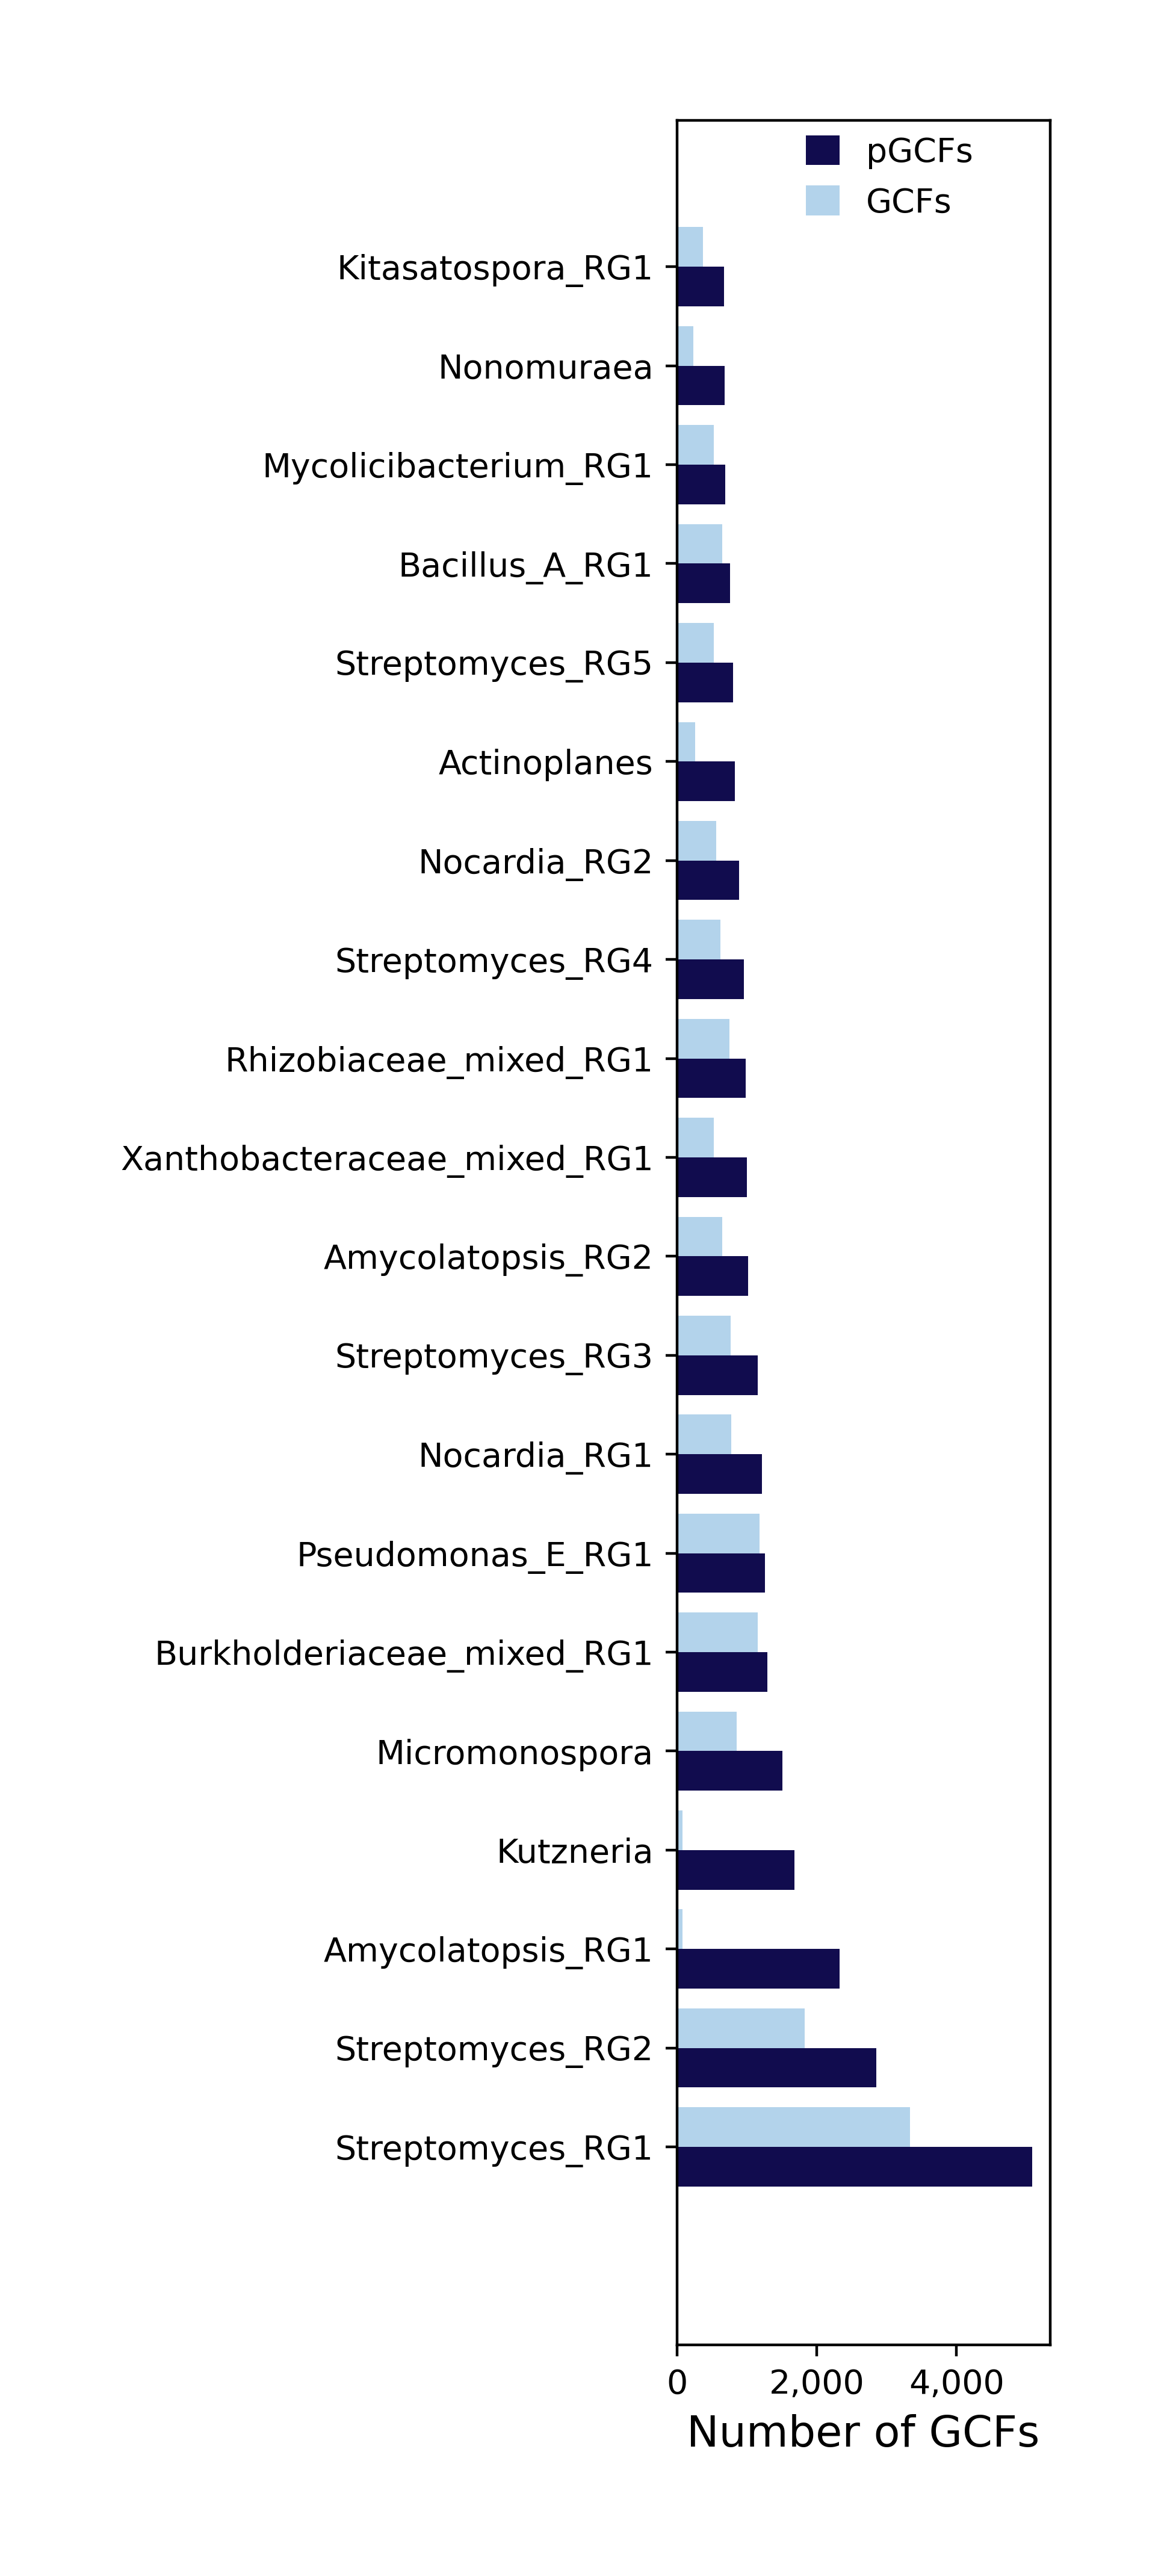

In [12]:
f, ax = plt.subplots(figsize=(2, 12), dpi=400)

new_table_5_C['groups'] = pd.Categorical(new_table_5_C['groups'], categories=['GCFs', 'pGCFs'])

ax = sns.barplot(x="Number of GCFs", 
                 y="REDgroup", 
                 data = new_table_5_C, 
                 hue="groups", 
                 palette=["#070159","#a9d4f5"],
                 orient='h',
                 hue_order=["pGCFs","GCFs"])

ax.invert_yaxis()

ax.xaxis.set_ticks([0, 2000, 4000])

ax.set_ylim([-2, 20.48])

ax.set_ylabel(None)
ax.set_xlabel("Number of GCFs", fontsize=12.9)

ax.set_xticklabels(["0", "2,000", "4,000"])

sns.move_legend(ax, "lower center",bbox_to_anchor=(.57, 0.942), ncol=1, title=None, frameon=False)

ax.set_xticks([0,2000,4000]);

f.savefig('output_figure_5_C_i_Topic_10.png', dpi=400)

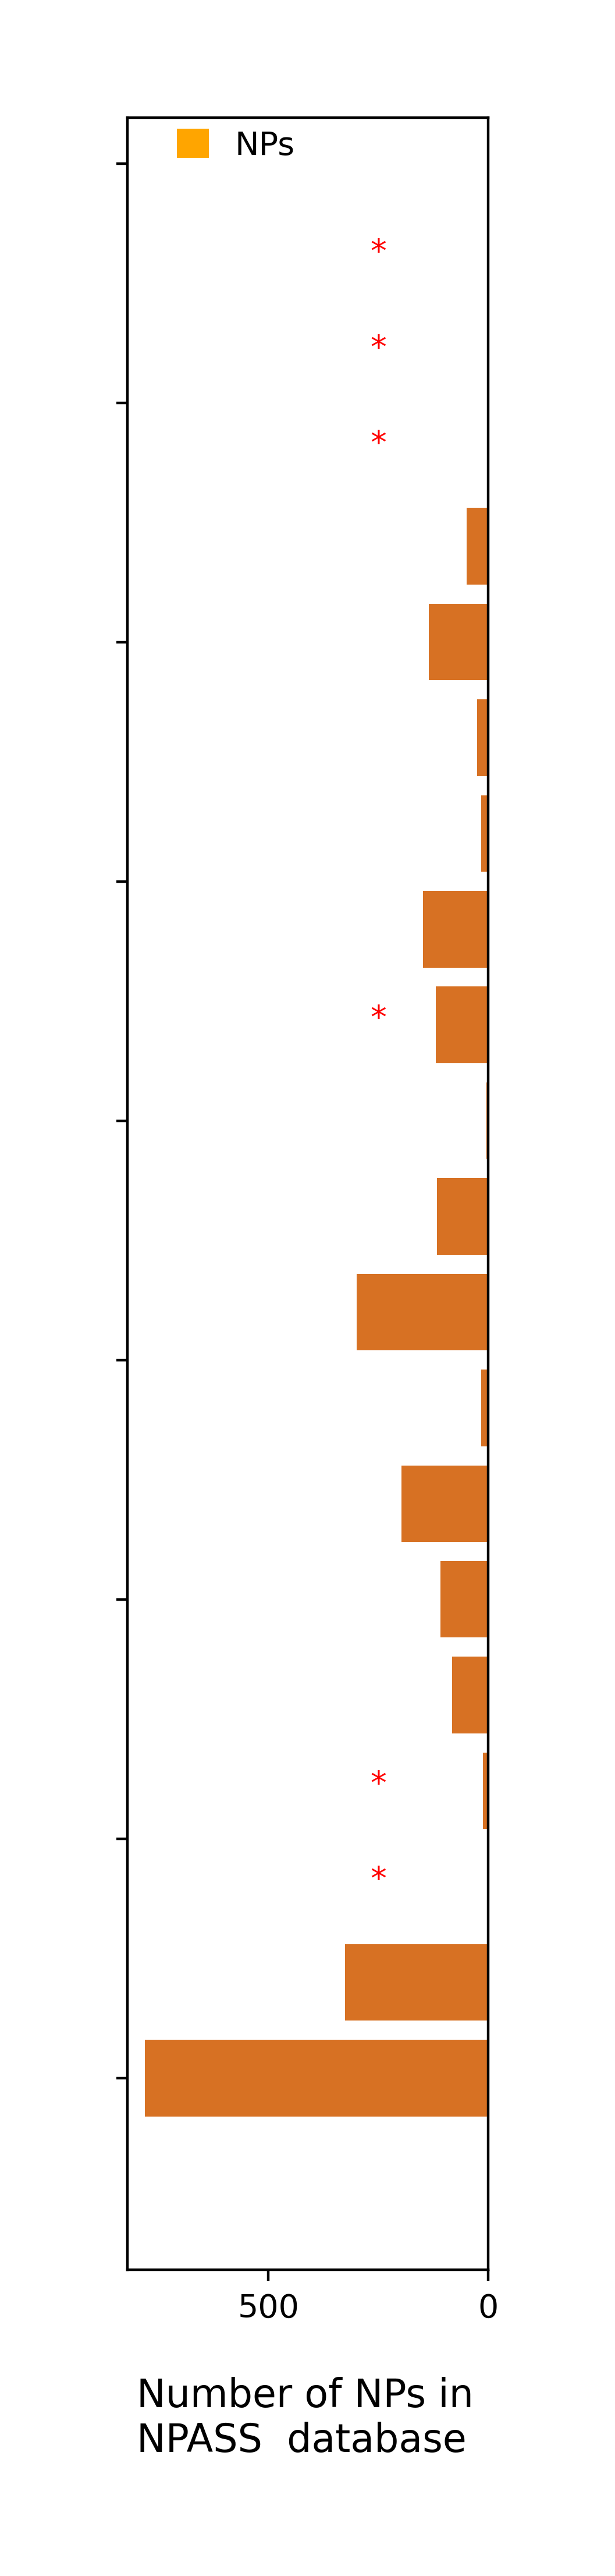

In [13]:
legend_elements = [Patch(facecolor='orange', edgecolor='orange', label='NPs')]

f, ax = plt.subplots(figsize=(2, 12), dpi=400)

ax = sns.barplot(x="Number of NPs in NPASS", y="REDgroup", data = table_5_C, orient='h',color="#f56d05")

ax.legend(handles=legend_elements, loc="lower center", bbox_to_anchor=(.3, 0.966), ncol=1, title=None, frameon=False)

plt.text(250,1.9, "*", ha='center', va='bottom', color="red")
plt.text(250,2.9, "*", ha='center', va='bottom', color="red")
plt.text(250,10.9, "*", ha='center', va='bottom', color="red")
plt.text(250,16.9, "*", ha='center', va='bottom', color="red")
plt.text(250,17.9, "*", ha='center', va='bottom', color="red")
plt.text(250,18.9, "*", ha='center', va='bottom', color="red")

ax.invert_xaxis()
ax.invert_yaxis()

ax.set(yticklabels=[])
ax.set(ylabel=None)

yticks = [i*20/8 for i in range(0,9)]
ax.set_yticks(yticks)

ax.set_xticks([0,500])

ax.text(800, -3.9, "Number of NPs in\nNPASS  database", fontsize=12, multialignment="left")

ax.set_ylim([-2, 20.48])

ax.set_xlabel(None)
ax.set_ylabel(None)

plt.show()

f.savefig('output_figure_5_C_ii_Topic_10.png', dpi=400)

### END OF FIGURE 5 $A,B,C_i,C_{ii}$